---------------------
# Project: Marketing Campaign Analysis
**Marks:60**
--------------------

Welcome to the project on Foundations for Data Science. In this project, we aim to analyze marketing data and address some important business problems/questions.

---------------------
## Context
--------------------

Marketing Analytics broadly refers to the practice of using analytical methods and techniques to understand the effectiveness of various marketing activities and deploy data-driven decisions to optimize for ROI on conversion rates. It typically involves analyzing various metrics around customer engagement with various marketing activities including but not limited to, ATL (above the line) marketing activities, BTL (below the line) campaigns, targeting personalized offers. Typically the variables of interest are customer profile, campaign conversion rates, and costs associated with various marketing channels. These can generate valuable insights that can help an organization form better marketing strategies, optimize/innovate on delivery, and achieve overall growth. 

---------------------
## Problem Statement
--------------------
Company 'All You Need' has hired you as a Data Scientist and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be and the conversion rate is very low.
Your task is to analyze the related data, understand the problem, and identify key insights and recommendations for the CMO to potentially implement.  

The data set marketing_data.csv consists of 2,240 customers of All You Need company with data on:

- Campaign successes/failures
- Product preferences
- Channel performances
- Customer profiles based on the spending habits

-------------------
## Data Dictionary
-------------------
- ID : Unique ID of each customer
- Year_Birth : Age of the customer
- Education : Customer's level of education
- Marital_Status : Customer's marital status
- Kidhome : Number of small children in customer's household
- Teenhome : Number of teenagers in customer's household
- Income : Customer's yearly household income
- Recency : Number of days since the last purchase
- MntFishProducts : The amount spent on fish products in the last 2 years
- MntMeatProducts : The amount spent on meat products in the last 2 years
- MntFruits : The amount spent on fruits products in the last 2 years
- MntSweetProducts : Amount spent on sweet products in the last 2 years
- MntWines : The amount spent on wine products in the last 2 years
- MntGoldProds : The amount spent on gold products in the last 2 years
- NumDealsPurchases : Number of purchases made with discount
- NumCatalogPurchases : Number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases : Number of purchases made directly in stores
- NumWebPurchases : Number of purchases made through the company's website
- NumWebVisitsMonth : Number of visits to company's website in the last month
- AcceptedCmp1 : 1 if customer accepted the offer in the first campaign, 0 otherwise 
- AcceptedCmp2 : 1 if customer accepted the offer in the second campaign, 0 otherwise
- AcceptedCmp3 : 1 if customer accepted the offer in the third campaign, 0 otherwise
- AcceptedCmp4 : 1 if customer accepted the offer in the fourth campaign, 0 otherwise
- AcceptedCmp5 : 1 if customer accepted the offer in the fifth campaign, 0 otherwise
- AcceptedCmp6 : 1 if customer accepted the offer in the last campaign, 0 otherwise 
- Complain : 1 If the customer complained in the last 2 years, 0 otherwise
- Country: Country customer belongs to

## Importing libraries and overview of the dataset

In [1301]:
# Library to supress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1302]:
# from google.colab import files
# uploaded = files.upload()

### Load the dataset

In [1303]:
# loading the datset

df = pd.read_csv('Marketing+data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,6,1,0,1,0,0,0,0,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,7,5,0,1,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,2,7,1,1,0,0,0,0,0,SP


### Check info of the dataset

In [1304]:
#Checking the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

**Observations:**
- There are a total of 27 columns and 2,240 observations in the dataset
- We can see that the Income column has less than 2,240 non-null values i.e. column has missing values. We'll explore this further


### Let's check the percentage of missing values for the Income column.

In [1305]:
# % Null values in the Income column

(df.isnull().sum()/df.shape[0]*100)['Income']

1.0714285714285714

In [1306]:
df.isnull().sum().T

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp6            0
Complain                0
Country                 0
dtype: int64

**Observations:**
- Income has ~1.07% missing values.

### Let's create a list for numerical columns in the dataset and check the summary statistics 

### **Question 1: Find the summary statistics for numerical columns and write your observations. (use describe function).** - 4 Marks

In [1307]:
# num_cols contain numerical varibales 
num_cols=['Year_Birth','Income','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Kidhome',
       'Teenhome']

In [1308]:
# printing descriptive statistics of numerical columns

#Uncomment the following code and fill in the blanks
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.00,2.0,3.00,15.0


**Observations:
-Quality of the data is good when it comes to null values, with only 24 null values in income that we will handle in the cleaning process by replacing them with mean
- the average year of birth of customers is 1968 with maximum birth date in 1996 and minimum in 1893 that I would expect will impact effectiveness of campaigns and channels via which campaigns are run. Which hypothesis I will verify later in correlation analysis. 50% of customers were born in 1970. It would be interesting to see when the campaigns were run. The difference between oldest and youngest customer is 103 years which again questions when the campaigns were run and how old the customers were during the campaign. It is year 2022 and many of the customers may be dead. We should remove data for customers that were born before year 1900 as it is very unlikely, they are still alive that would distort the information. They are outliers therefore are removed from the data set
- The average purchase is for 606 with the highest spend of 2525 with high standard deviation which means we have outliers
- most of the purchases were made in the last 14 days on average, with oldest purchases made 44 days ago with standard distribution of purchases over time. Most of purchases are made within 15 days of gathering the figures. There was a drop in purchases 20 days ago, after which time the number of purchases has increased to previous averages. There was a significant drop around 40 days ago
- most amount of money was spent on wine products with average of 304 and meat products on average 167 with high variation towards 1725 while other products being sold on average for 4 times less, with much small variation, each o the products characterizes with many outliers
On 2232 observations we have large set of data falling outside of outlier for:
*Fish products 223
*Meat products 174
*Fruits 247
- the average income is circa 52k however with large standard deviation which means that we have data points potential outliers far away from mean. Which we can see on the box plot. There are 8 instances that our outliers distorting our measurements with Income IQR being at circa 120k and the highest outlier with income over 600k .There is only one of such case with ID of 9432 that we need removing from out data set. 4 customers have not made more than purchases than 3 with 2 of them buying nothing in the last 2 years. The entire group of outliers have not spent in total more than 125 thus can be removed from the data set as insignificant. None of the outliers also accepted any of the campaigns or submitted complaints. The outliers spend almost 39 times more on average on meat products than non-outliers
- Nearly 58 percent of customers have no kids and 40 percent having 1 with only 2 percent having 2 kids
Nearly 52 percent have no children teens at home, 46% with 1 and 2% with 2 teens
On average every customer has got 0,5 child
- We can see a large number or purchases (almost 1k) made  with one discount, to be followed by 2 3 and 4. There fewer purchases made with discount when the number exceeds 7. It looks that customers prefer making purchases when discount is given
- there is vast majority of customers who made 1 or 2 catalog purchases  with data being skewed to the right with average of 2,6 purchase and maximum 28
- web purchases mostly  take place between 0 and 12 purchases with most customers purchasing via the web 3 times, with 5 purchases on average
- store purchases are on average 5,8 that is slightly higher than web purchases 
-there are merely no complains from customers with average of 0,0089 and maximum 1 complaint




In [1309]:
df["Year_Birth"].max()-df["Year_Birth"].min()

103

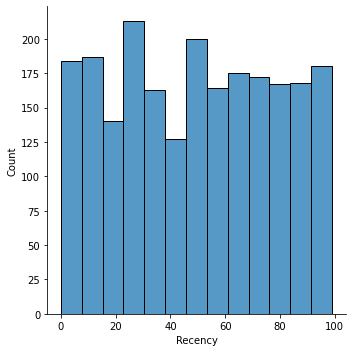

In [1310]:
sns.displot(data=df["Recency"])

### Let's create a list for categorical columns in the dataset and check the count of each category

In [1311]:
#cat_cols contain categorical variables
cat_cols=['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp6', 'Complain', 'Country']

In [1312]:
# Printing the count of each unique value in each column

for column in cat_cols:
    print(df[column].value_counts(normalize=True))
    print("-" * 40)

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64
----------------------------------------
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
YOLO        0.000893
Absurd      0.000893
Name: Marital_Status, dtype: float64
----------------------------------------
0    0.927232
1    0.072768
Name: AcceptedCmp3, dtype: float64
----------------------------------------
0    0.935714
1    0.064286
Name: AcceptedCmp4, dtype: float64
----------------------------------------
0    0.925446
1    0.074554
Name: AcceptedCmp5, dtype: float64
----------------------------------------
0    0.927232
1    0.072768
Name: AcceptedCmp1, dtype: float64
----------------------------------------
0    0.850893
1    0.149107
Name: AcceptedCmp2, dtype: float64
----------------------------------------
0    0.986607
1    0.013393
Name: AcceptedCmp6

**Observations:**
- In education, 2n cycle and Master means the same thing. We can combine these two categories.
- There are many categories in marital status. We can combine the category 'Alone' with 'Single'.
- It is not clear from the data that what do the terms 'Absurd', and 'YOLO' actually mean. We can combine these categories to make a new category - 'Others'.
- There are only 21 customers who complained in the last two years.
- The majority of the customers belong to Spain and least to Mexico.
- The most common educational status is Graduation
- The most common marital status is Married

## Data Preprocessing and Exploratory Data Analysis

In this section, we will first prepare our dataset for analysis.
- Fixing the categories
- Creating new columns as the total amount spent, total purchase made, total kids at home, and total accepted campaigns
- Dealing with missing values and outliers
- Extract key insights from the data

### Replacing the "2n Cycle" category with "Master" in Education and "YOLO", "Alone", and "Absurd" categories with "Single" in Marital_Status

In [1313]:
# Replacing 2n Cycle with Master

df["Education"].replace("2n Cycle", "Master", inplace=True)

In [1314]:
# Replacing YOLO, Alone, Absurd with Single

df["Marital_Status"].replace(["Alone",], "Single", inplace=True)

In [1315]:
df['Marital_Status'].replace(["Absurd", "YOLO"], "Others", inplace=True)

We have fixed the categories in the Marital_Status. Now, let's see the distribution count in different categories for marital status.

In [1316]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      483
Divorced    232
Widow        77
Others        4
Name: Marital_Status, dtype: int64

**Observation**:

- The majority of customer belong to married category and the other category have only 4 observations.

### Creating new features from the existing features

In [1317]:
dfc=df

In [1318]:
# creating new features to get overall picture of a customer, how much he/she has spend, 
#how many children he/she has, total campaigns accepted, etc.


# total spending by a customer
spending_col = [col for col in df.columns if 'Mnt' in col]
df['Total_Spending'] = df[spending_col].sum(axis = 1) 

#total purchases made by a customer
platform_col = [col for col in df.columns if 'Purchases' in col]
df['Total_Purchase'] = df[platform_col].sum(axis = 1) 

#total no. of childern
df['NumberofChildren'] = df['Kidhome'] + df['Teenhome']  

# Total no. of campaign accepted by a customer
campaigns_cols = [col for col in df.columns if 'Cmp' in col]
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)

### Let's check outliers for new variables - Total_Spending, Total_Purchase. Also, let's analyze the Year_Birth column as we observed above that it had a minimum value of 1893.

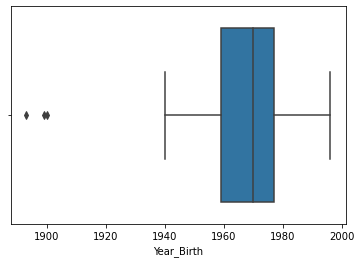

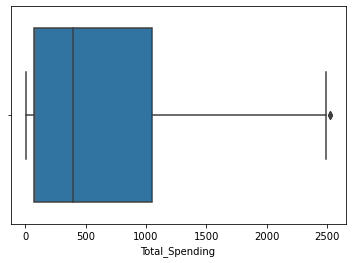

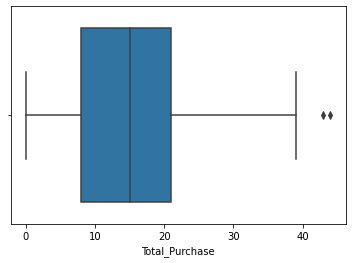

In [1319]:
# Plotting boxplot for Year_Birth, Total_Spending, Total_Purchase

cols=['Year_Birth','Total_Spending','Total_Purchase']
for i in cols:
    sns.boxplot(x=df[i])
    plt.show()

**Observations:**
- The birth year is reported as <=1900 for some users, while the current year is 2021. it's very unlikely that the person is alive. it may be a reporting error.
- There are some outliers in total spending and total purchase. 
- The observations marked as outliers are very closed to the upper whisker and some extreme points can be expected for variables like total spending. We can leave these outliers untreated. 

Let's check the number of observations for which year birth is less than 1900. 

In [1320]:
df[df['Year_Birth'] < 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
513,11004,1893,Master,Single,60182.0,0,1,23,8,0,...,0,0,0,0,0,SA,22,4,1,0
827,1150,1899,PhD,Together,83532.0,0,0,36,755,144,...,1,0,0,0,0,SP,1853,15,0,1


**Observation**:
- There are only 2 observations for which birth year is less than 1900. We can drop these observations.

In [1321]:
#keeping data for customers having birth year >1900

df = df[df['Year_Birth'] > 1900]

### Check the outliers and impute the missing values for the Income variable

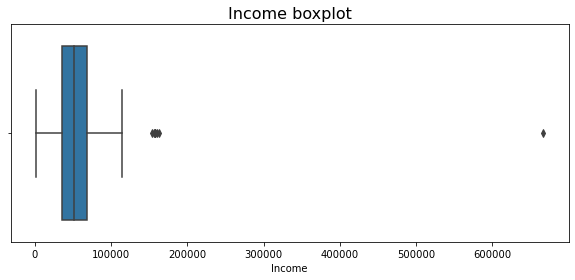

In [1322]:
#plotting Boxplot for income

plt.figure(figsize=(10,4))
sns.boxplot(df['Income'])
plt.title('Income boxplot', size=16)
plt.show()

**Observations:**

- We can see from the boxplot that there are some outliers in the income variable.
- Let's find the value at upper whisker to check how many observations are marked as outliers.


In [1323]:
#Calculating the upper whisker for the Income variable

Q1 = df.quantile(q=0.25) #First quartile
Q3 = df.quantile(q=0.75) #Third quartile
IQR = Q3 - Q1            #Inter Quartile Range

upper_whisker = (Q3 + 1.5*IQR)['Income']   #Upper Whisker
print(upper_whisker)

118348.5


In [1324]:
#Checking the observations marked as outliers
df[df.Income>upper_whisker]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
325,4931,1977,Graduation,Together,157146.0,0,0,13,1,0,...,0,0,0,0,0,SA,1730,28,0,0
497,1501,1982,PhD,Married,160803.0,0,0,21,55,16,...,0,0,0,0,0,US,1717,44,0,0
527,9432,1977,Graduation,Together,666666.0,1,0,23,9,14,...,0,0,0,0,0,SA,62,11,1,0
731,1503,1976,PhD,Together,162397.0,1,1,31,85,1,...,0,0,0,0,0,SP,107,1,2,0
853,5336,1971,Master,Together,157733.0,1,0,37,39,1,...,0,0,0,0,0,SP,59,2,1,0
1826,5555,1975,Graduation,Divorced,153924.0,0,0,81,1,1,...,0,0,0,0,0,SP,6,0,0,0
1925,11181,1949,PhD,Married,156924.0,0,0,85,2,1,...,0,0,0,0,0,CA,8,0,0,0
2204,8475,1973,PhD,Married,157243.0,0,1,98,20,2,...,0,0,0,0,0,IND,1608,37,1,0


In [1325]:
#what is the total number of purchases
columns=["NumStorePurchases","NumCatalogPurchases", "NumStorePurchases", "NumWebPurchases"]
outlier=df[df.Income>upper_whisker]
outlier=outlier[["ID"]+columns+["Income","Recency"]]
outlier['Total_Purchases']=df[columns].sum(axis=1)
#out2=pd.DataFrame(out2,columns=)
outlier.sort_values("Total_Purchases")

,ID,NumStorePurchases,NumCatalogPurchases,NumStorePurchases,NumWebPurchases,Income,Recency,Total_Purchases
1826,5555,0,0,0,0,153924.0,81,0
1925,11181,0,0,0,0,156924.0,85,0
731,1503,1,0,1,0,162397.0,31,2
853,5336,1,0,1,1,157733.0,37,3
527,9432,3,1,3,3,666666.0,23,10
2204,8475,0,22,0,0,157243.0,98,22
325,4931,0,28,0,0,157146.0,13,28
497,1501,1,28,1,0,160803.0,21,30


In [1326]:
#check total purchase of outlier 
dfc[dfc.Income>upper_whisker]["Total_Purchase"].sum()

123

**Observations**:

- We have only 8 observations with an income greater than the upper whisker. 
- Only 3 observations (ID- 4931, 1501, 8475) out of 8 outliers have purchased more than 11 times in the last 2 years.
- Other 5 observations have very less amount of total spending.

**Let's compare the summary statistics for these observations with observations on the other side of the upper whisker.**

In [1327]:
#Checking the summary statistics for observations marked as outliers
df[df.Income>upper_whisker].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8.0,5989.250,3525.251308,1501.0,4074.00,5445.5,8714.25,11181.0
Year_Birth,8.0,1972.500,10.028531,1949.0,1972.50,1975.5,1977.00,1982.0
Income,8.0,221604.500,179850.404431,153924.0,157090.50,157488.0,161201.50,666666.0
Kidhome,8.0,0.375,0.517549,0.0,0.00,0.0,1.00,1.0
Teenhome,8.0,0.250,0.462910,0.0,0.00,0.0,0.25,1.0
Recency,8.0,48.625,33.687376,13.0,22.50,34.0,82.00,98.0
MntWines,8.0,26.500,30.798887,1.0,1.75,14.5,43.00,85.0
MntFruits,8.0,4.500,6.524678,0.0,1.00,1.0,5.00,16.0
MntMeatProducts,8.0,621.875,846.511402,1.0,7.25,17.0,1592.00,1725.0
MntFishProducts,8.0,4.250,5.650537,1.0,1.00,2.0,3.50,17.0


In [1328]:
#Checking the summary statistics for observations not marked as outliers
df[df.Income<upper_whisker].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2205.0,5585.439456,3247.546423,0.0,2815.0,5455.0,8418.0,11191.0
Year_Birth,2205.0,1968.904308,11.705801,1940.0,1959.0,1970.0,1977.0,1996.0
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Kidhome,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
Teenhome,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0


In [1329]:
a=dfc[dfc.Income>upper_whisker].describe().T
b=dfc[dfc.Income<upper_whisker].describe().T

In [1330]:
compout=pd.concat([a,b],axis=1)
compout

,count,mean,std,min,25%,50%,75%,max,count,mean,std,min,25%,50%,75%,max
ID,8.0,5989.250,3525.251308,1501.0,4074.00,5445.5,8714.25,11181.0,2208.0,5586.900815,3249.110303,0.0,2814.75,5458.5,8418.50,11191.0
Year_Birth,8.0,1972.500,10.028531,1949.0,1972.50,1975.5,1977.00,1982.0,2208.0,1968.807065,11.991913,1893.0,1959.00,1970.0,1977.00,1996.0
Income,8.0,221604.500,179850.404431,153924.0,157090.50,157488.0,161201.50,666666.0,2208.0,51633.638134,20713.376530,1730.0,35196.00,51301.0,68289.75,113734.0
Kidhome,8.0,0.375,0.517549,0.0,0.00,0.0,1.00,1.0,2208.0,0.442029,0.537063,0.0,0.00,0.0,1.00,2.0
Teenhome,8.0,0.250,0.462910,0.0,0.00,0.0,0.25,1.0,2208.0,0.506341,0.544325,0.0,0.00,0.0,1.00,2.0
Recency,8.0,48.625,33.687376,13.0,22.50,34.0,82.00,98.0,2208.0,49.014040,28.938638,0.0,24.00,49.0,74.00,99.0
MntWines,8.0,26.500,30.798887,1.0,1.75,14.5,43.00,85.0,2208.0,306.100996,337.516270,0.0,24.00,177.5,507.00,1493.0
MntFruits,8.0,4.500,6.524678,0.0,1.00,1.0,5.00,16.0,2208.0,26.435236,39.842478,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,8.0,621.875,846.511402,1.0,7.25,17.0,1592.00,1725.0,2208.0,165.347826,217.852649,0.0,16.00,68.0,232.00,1725.0
MntFishProducts,8.0,4.250,5.650537,1.0,1.00,2.0,3.50,17.0,2208.0,37.758605,54.813323,0.0,3.00,12.0,50.00,259.0


In [1331]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
count,2237.000000,2237.000000,2213.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,...,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,5590.726419,1968.901654,52236.581563,0.444345,0.506482,49.104604,303.995530,26.270451,166.916853,37.523022,...,0.149307,0.072418,0.064372,0.074654,0.013411,0.008941,605.743406,14.870809,0.950827,0.447027
std,3245.118591,11.701917,25178.603047,0.538467,0.544593,28.956073,336.574382,39.715972,225.661158,54.639909,...,0.356471,0.259237,0.245469,0.262890,0.115052,0.094152,601.840466,7.676593,0.752037,0.890964
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,2829.000000,1959.000000,35246.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,8.000000,0.000000,0.000000
50%,5455.000000,1970.000000,51373.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,396.000000,15.000000,1.000000,0.000000
75%,8427.000000,1977.000000,68487.000000,1.000000,1.000000,74.000000,504.000000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1045.000000,21.000000,1.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000,44.000000,3.000000,5.000000


**Observations**:

- None of the outliers have accepted any of the campaigns or have submitted any complaints in the last 2 years.
- We can see that customers who are outliers have lower mean expenditure per customer for all the products except meat products.
- The outliers have a higher number of catalog purchases on average and very low number of web purchases.
- We can drop the 5 observations at indices [527, 731, 853, 1826, 1925] as they would not add value to our analysis.

In [1332]:
#Dropping 5 observations at indices 527, 731, 853, 1826, 1925
df.drop(index=[527, 731, 853, 1826, 1925], inplace=True)

### Check the distribution for Income

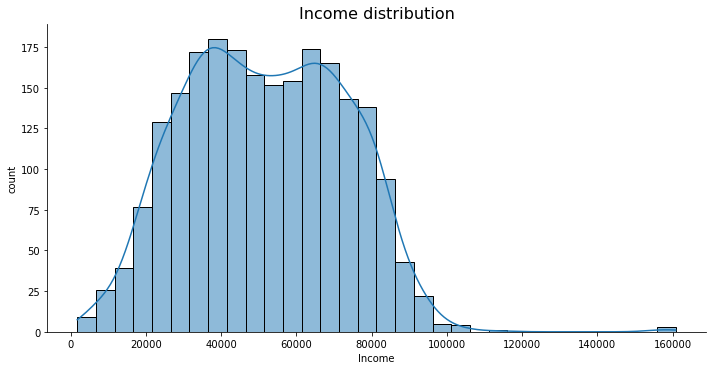

In [1333]:
#plotting displot for income

sns.displot(df['Income'], kde=True, height=5, aspect=2)
plt.title('Income distribution', size=16, )
plt.ylabel('count');

**Observations:**

- After treating outliers, the distribution for the income variable is close to normal distribution with very few extreme observations to the right.
- We will replace the missing values for the income variable with the median, and not mean, as the variable is slightly skewed to the right

In [1334]:
#filling null values with median

df['Income'].fillna(df.Income.median(), inplace=True)

### Analyse kids at home

In [1335]:
kids=df["Kidhome"].value_counts().to_frame()
kids

,Kidhome
0,1289
1,895
2,48


In [1336]:
kids["Total"]=kids["Kidhome"].sum()
kids
kids["Kidhome"]/kids["Total"]*100

0    57.750896
1    40.098566
2     2.150538
dtype: float64

In [1337]:
teen=df["Teenhome"].value_counts().to_frame()
teen

,Teenhome
0,1152
1,1028
2,52


In [1338]:
teen["Total"]=teen["Teenhome"].sum()
teen["Teenhome"]/teen["Total"]*100

0    51.612903
1    46.057348
2     2.329749
dtype: float64

In [1339]:
children=pd.concat([teen,kids])
children

,Teenhome,Total,Kidhome
0,1152.0,2232,NaN
1,1028.0,2232,NaN
2,52.0,2232,NaN
0,NaN,2232,1289.0
1,NaN,2232,895.0
2,NaN,2232,48.0


In [1340]:
totalkids=teen["Teenhome"].sum()+kids["Kidhome"].sum()
totalkids


4464

In [1341]:
df.shape[0]

2232

In [1342]:
df.shape[0]/totalkids

0.5

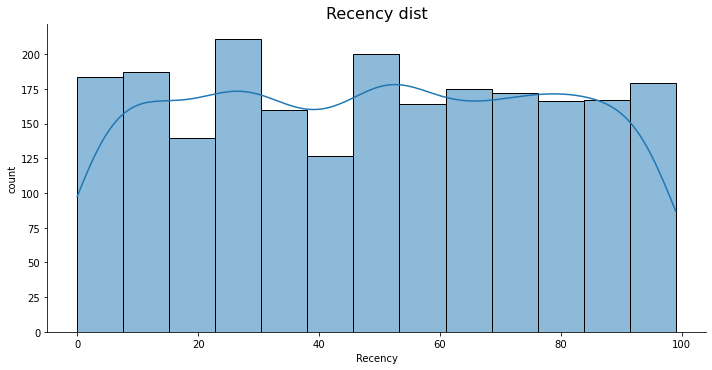

In [1343]:
sns.displot(df['Recency'], kde=True, height=5, aspect=2)
plt.title('Recency dist', size=16, )
plt.ylabel('count');

### Analyse data after removal of outliers

In [1344]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2232.0,5588.462366,3244.418248,0.0,2828.25,5454.5,8421.75,11191.0
Year_Birth,2232.0,1968.900090,11.704426,1940.0,1959.00,1970.0,1977.00,1996.0
Income,2232.0,51762.598118,20956.013714,1730.0,35434.75,51342.0,68130.00,160803.0
Kidhome,2232.0,0.443996,0.538520,0.0,0.00,0.0,1.00,2.0
Teenhome,2232.0,0.507168,0.544680,0.0,0.00,0.0,1.00,2.0
Recency,2232.0,49.099462,28.961728,0.0,24.00,49.0,74.00,99.0
MntWines,2232.0,304.615591,336.692448,0.0,24.00,175.5,505.00,1493.0
MntFruits,2232.0,26.321237,39.745169,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2232.0,167.270161,225.789953,0.0,16.00,68.0,232.00,1725.0
MntFishProducts,2232.0,37.600806,54.676201,0.0,3.00,12.0,50.00,259.0


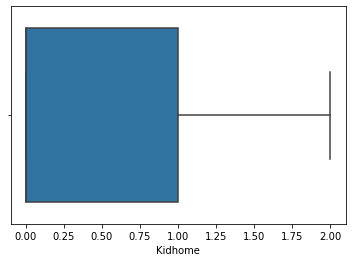

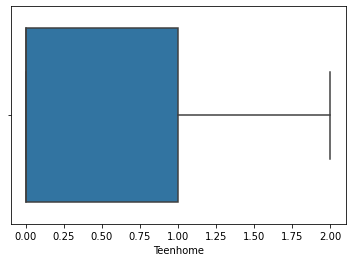

In [1345]:
cols=['Kidhome','Teenhome']
for i in cols:
    sns.boxplot(x=df[i])
    plt.show()

In [1346]:
productslist = [col for col in df.columns if 'Mnt' in col]
productslist

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

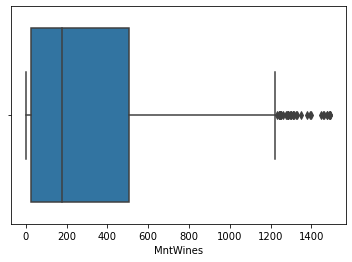

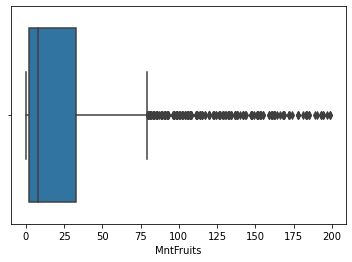

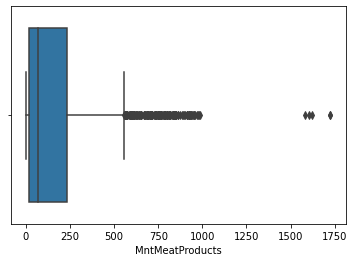

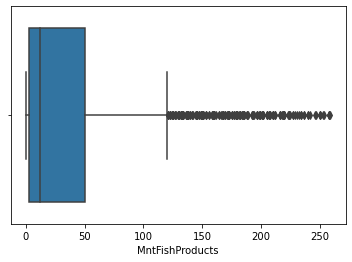

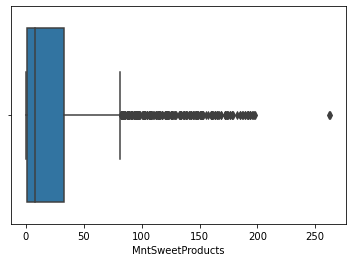

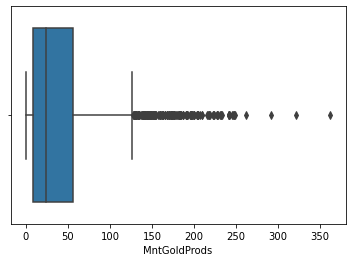

In [1347]:
# Plotting boxplot for products

for i in productslist:
    sns.boxplot(x=df[i])
    plt.show()

In [1348]:
#Calculating the upper whisker for the Meat variable

Q1 = df.quantile(q=0.25) #First quartile
Q3 = df.quantile(q=0.75) #Third quartile
IQR = Q3 - Q1            #Inter Quartile Range

upper_whisker = (Q3 + 1.5*IQR)['MntMeatProducts']   #Upper Whisker
print(upper_whisker)

556.0


In [1349]:
df[df['MntMeatProducts'] > 556]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
31,9264,1986,Graduation,Married,79529.0,0,0,1,423,42,...,0,0,0,0,0,CA,1638,22,0,0
45,9595,1961,Graduation,Together,64260.0,0,0,1,539,169,...,0,0,0,0,0,SP,1574,14,0,1
53,1619,1956,Graduation,Married,90369.0,0,0,2,292,51,...,0,0,0,0,0,SP,1588,17,0,1
77,7919,1976,PhD,Together,72335.0,0,0,2,1285,105,...,0,0,0,0,0,SP,2092,23,0,1
78,4114,1964,Master,Married,79143.0,0,0,2,650,37,...,0,0,0,0,0,AUS,1693,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,313,1968,Graduation,Widow,73455.0,0,0,98,901,61,...,0,0,1,0,0,SA,2088,22,0,1
2212,3979,1983,PhD,Divorced,90687.0,0,0,98,982,17,...,1,0,0,0,0,SP,1779,17,0,2
2218,4974,1970,Graduation,Single,83273.0,1,2,98,433,89,...,0,0,0,0,0,US,1392,29,3,0
2219,5687,1980,Graduation,Divorced,81702.0,0,0,98,563,50,...,0,0,0,0,0,CA,1633,27,0,0


In [1350]:
#Calculating the upper whisker for the Meat variable

Q1 = df.quantile(q=0.25) #First quartile
Q3 = df.quantile(q=0.75) #Third quartile
IQR = Q3 - Q1            #Inter Quartile Range

upper_whisker = (Q3 + 1.5*IQR)['MntFishProducts']   #Upper Whisker
print(upper_whisker)

120.5


In [1351]:
df[df['MntFishProducts'] > 120.5]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
5,7348,1958,PhD,Single,71691.0,0,0,0,336,130,...,0,0,0,0,0,SP,1192,17,0,1
36,2681,1984,Master,Married,65370.0,0,0,1,71,22,...,0,0,0,0,0,SP,461,19,0,0
51,1402,1954,Master,Married,66991.0,0,0,1,496,36,...,0,0,0,0,0,GER,1253,21,0,0
53,1619,1956,Graduation,Married,90369.0,0,0,2,292,51,...,0,0,0,0,0,SP,1588,17,0,1
58,10286,1962,Graduation,Married,83715.0,0,0,2,318,8,...,0,0,0,0,0,SA,926,24,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,5602,1989,PhD,Together,66973.0,0,0,98,466,22,...,0,0,0,0,0,IND,1282,28,0,0
2223,2831,1976,Graduation,Together,78416.0,0,1,99,453,38,...,0,0,0,0,0,SP,1179,26,1,0
2226,1743,1974,Graduation,Single,69719.0,0,0,99,273,86,...,0,0,0,0,0,SP,801,11,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,99,267,38,...,0,0,0,0,0,IND,1383,20,0,0


In [1352]:
#Calculating the upper whisker for the Meat variable

Q1 = df.quantile(q=0.25) #First quartile
Q3 = df.quantile(q=0.75) #Third quartile
IQR = Q3 - Q1            #Inter Quartile Range

upper_whisker = (Q3 + 1.5*IQR)['MntFruits']   #Upper Whisker
print(upper_whisker)

79.5


In [1353]:
df[df['MntFruits'] > 79.5]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,0,0,0,0,0,SP,1190,15,0,1
5,7348,1958,PhD,Single,71691.0,0,0,0,336,130,...,0,0,0,0,0,SP,1192,17,0,1
6,4073,1954,Master,Married,63564.0,0,0,0,769,80,...,0,0,0,0,0,GER,1215,28,0,2
12,10530,1959,PhD,Widow,67786.0,0,0,0,431,82,...,0,0,0,0,0,IND,1156,16,0,1
29,9687,1975,Graduation,Single,73170.0,0,0,1,184,174,...,0,0,0,0,0,CA,726,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,8602,1964,Graduation,Divorced,69932.0,0,1,97,412,172,...,0,0,0,0,0,SP,1049,26,1,0
2197,9940,1958,Graduation,Together,64961.0,0,1,97,382,114,...,0,0,0,0,0,SA,1009,16,1,0
2215,9645,1968,Graduation,Married,64590.0,0,0,98,920,138,...,0,0,0,0,0,SP,1338,24,0,0
2218,4974,1970,Graduation,Single,83273.0,1,2,98,433,89,...,0,0,0,0,0,US,1392,29,3,0


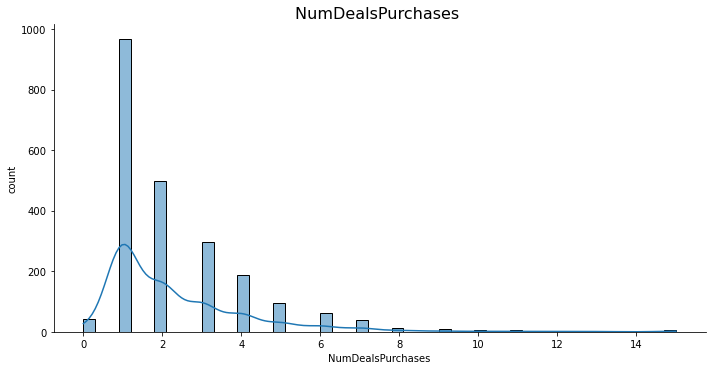

In [1354]:


sns.displot(df['NumDealsPurchases'], kde=True, height=5, aspect=2)
plt.title('NumDealsPurchases ', size=16, )
plt.ylabel('count');

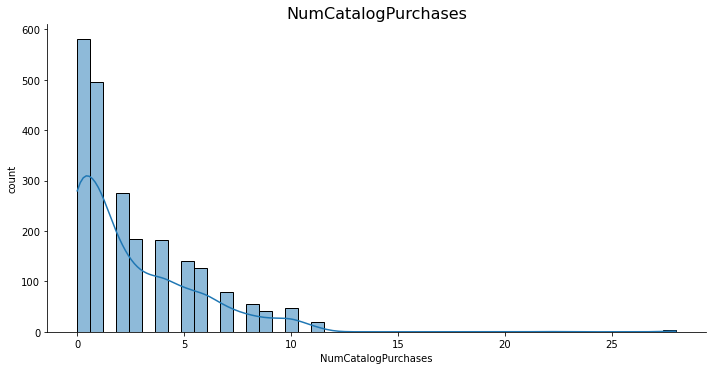

In [1355]:


sns.displot(df['NumCatalogPurchases'], kde=True, height=5, aspect=2)
plt.title('NumCatalogPurchases', size=16, )
plt.ylabel('count');

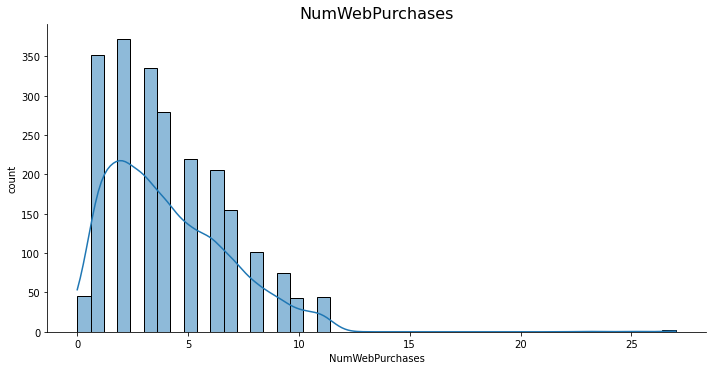

In [1356]:


sns.displot(df['NumWebPurchases'], kde=True, height=5, aspect=2)
plt.title('NumWebPurchases', size=16, )
plt.ylabel('count');

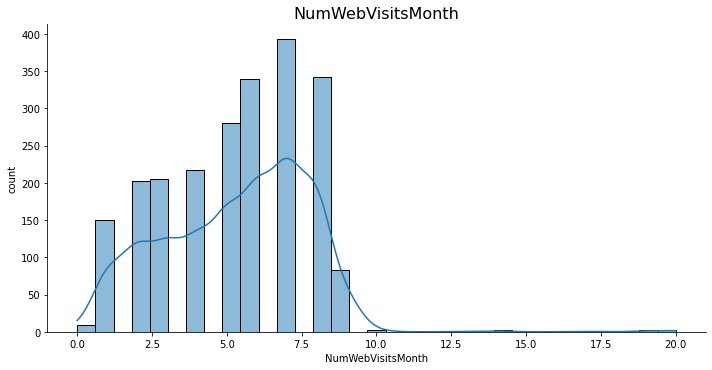

In [1357]:


sns.displot(df['NumWebVisitsMonth'], kde=True, height=5, aspect=2)
plt.title('NumWebVisitsMonth', size=16, )
plt.ylabel('count');

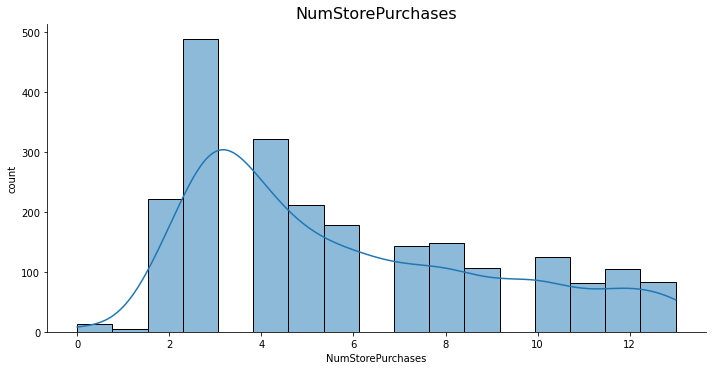

In [1358]:


sns.displot(df['NumStorePurchases'], kde=True, height=5, aspect=2)
plt.title('NumStorePurchases', size=16, )
plt.ylabel('count');

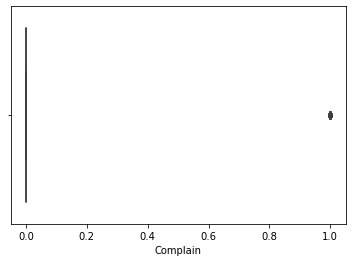

In [1359]:
# Plotting boxplot for products
sns.boxplot(df["Complain"])
plt.show()

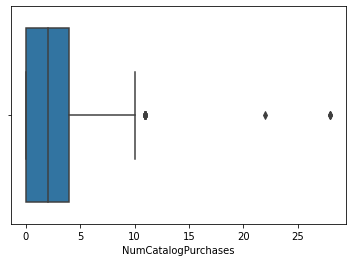

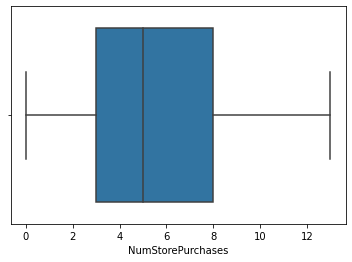

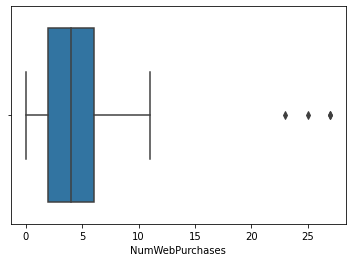

In [1360]:
cols=['NumCatalogPurchases','NumStorePurchases','NumWebPurchases']
for i in cols:
    sns.boxplot(x=df[i])
    plt.show()

### Analyzing all the campaigns

### **Question 2: Write your observations on acceptance rate for each campaign given in the below plot.** - 4 Marks

#### Let's find out what is the acceptance rate for each campaign?

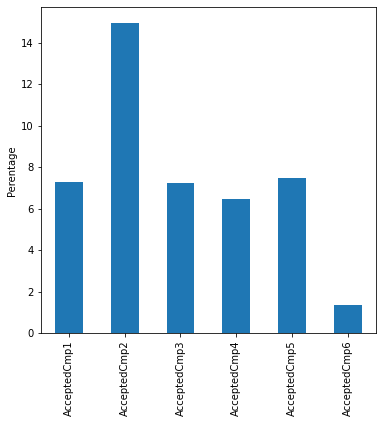

In [1396]:
# PLotting the % acceptance for every campaign

Camp_cols=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']

success_campaign=(df[Camp_cols].sum()/df.shape[0])*100

# plot
success_campaign.plot(kind='bar', figsize=(6,6))
plt.ylabel("Perentage")
plt.show()

**Observations:
there is high acceptance rate of customers who accepted the second offer that is almost 50% higher of acceptance than those who accepted the first campaign . In terms of acceptance campaigns 1,3,4,5 have got similar acceptance percentage, with campaig 6 being the least succesfull.
The higher the income  the more campaigns accepted, customers below 40k did not accept any of the campaigns beyond the second. There are few outliers with very high income who accepted offers in first camapign , but such high profile customers did not accept any other offers in following camaigns. It may be the case that campain 3,4,5 was targeted tomore wealthy customers, while 1 and 2 were targeted for broader spectrum of clients. We need to look into effectiveness of campaigns split per income levels.

### Let's analyze what kind of customer are accepting campaigns?

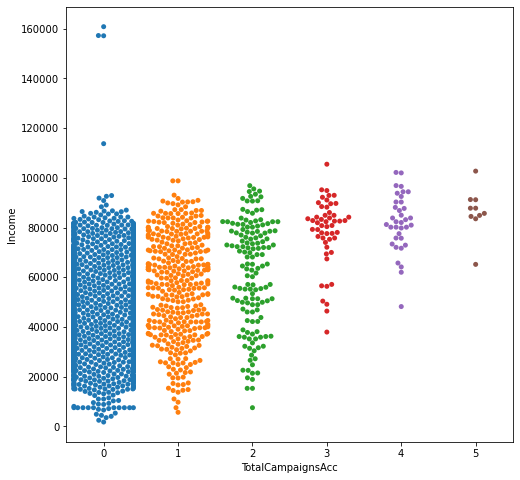

In [1362]:
plt.figure(figsize=(8,8))
sns.swarmplot(x='TotalCampaignsAcc', y='Income', data=df)
plt.show()

**Observations:**
- Higher the income higher the number of campaigns accepted.

In [1363]:
# Let's see the mean income of customers
df.Income.mean()

51762.59811827957

### **Question 3: Write your observations on acceptance rate for each campaign according to the income level.** - 7 Marks

The mean income of customers is close to 52K. Let's divide the income into 2 segments of income>52k and income<52k and see the acceptance rate in each segment.

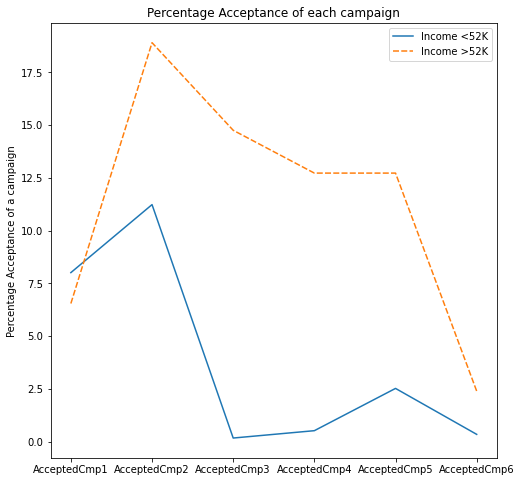

In [1364]:
# making dataframes of customers having income <52k and >52K
df1=df[df.Income<52000]
df2=df[df.Income>52000]

Camp_cols=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']

#Calculating success rate of each campaign for both segments 
success_campaign1=pd.DataFrame((df1[Camp_cols].sum()/df1.shape[0])*100, columns=['Income <52K'])

success_campaign2=pd.DataFrame((df2[Camp_cols].sum()/df2.shape[0])*100, columns=['Income >52K'])

new_df=pd.concat([success_campaign1, success_campaign2], axis=1)

# plot
plt.figure(figsize=(8,8))
sns.lineplot(data=new_df)
plt.title("Percentage Acceptance of each campaign")
plt.ylabel("Percentage Acceptance of a campaign")
plt.show()

**Observations:
Campains are more succesfull for customers with higher than average income. The both groups seem to follow the drend where we see increase in capain 2 that is the most signifficant to drop in campain 3 and to slightly increase in campain 5 to drop again to lowest levels in the latest campain. According to income analyis and accpetance campain 2 was the most succesfull and the 6th led to the biggest drop in acceptance. Campain 2,3,led also to steeper drop in acceptance of less wealthy customers reaching acceptance levels close to 1%.

In [1403]:
new_df["Income <52K"]-new_df["Income >52K"]

AcceptedCmp1     1.464122
AcceptedCmp2    -7.674505
AcceptedCmp3   -14.585932
AcceptedCmp4   -12.207979
AcceptedCmp5   -10.204495
AcceptedCmp6    -2.050092
dtype: float64

In [ ]:
new_df

Let's find out who has accepted the last campaign and what could be the reason?

In [1409]:
temp=df[df['AcceptedCmp6']==1]
temp

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc,income_cat
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,0,0,1,0,CA,577,18,0,2,high
38,3725,1961,PhD,Single,84865.0,0,0,1,1248,16,...,1,1,1,0,SP,1688,16,0,5,very_high
142,10089,1974,Graduation,Divorced,102692.0,0,0,5,168,148,...,1,1,1,0,SA,1112,29,0,5,very_high
152,8545,1954,Graduation,Divorced,85683.0,0,0,6,1296,17,...,1,1,1,0,SP,1789,17,0,5,very_high
196,3009,1962,PhD,Widow,71670.0,0,0,8,1462,16,...,0,1,1,0,SP,1766,15,0,4,very_high
259,5067,1994,Graduation,Together,80134.0,0,0,11,966,26,...,1,1,1,0,SP,1378,21,0,4,very_high
522,5758,1982,Graduation,Married,65169.0,0,0,23,1074,0,...,1,0,1,0,SP,1189,28,0,5,high
569,9972,1955,PhD,Together,46015.0,1,1,25,38,0,...,0,0,1,0,SA,46,5,2,2,medium
570,2945,1955,PhD,Together,46015.0,1,1,25,38,0,...,0,0,1,0,CA,46,5,2,2,medium
624,10140,1983,PhD,Together,70123.0,0,0,27,1308,0,...,0,1,1,0,IND,1727,17,0,2,very_high


- There are only 30 customers who have accepted the last campaign.
- Let's check if these customers are new or they have accepted previous campaigns as well.

In [1416]:
grouped2=df.groupby('AcceptedCmp6').mean()['TotalCampaignsAcc']
grouped2

AcceptedCmp6
0    0.404632
1    3.633333
Name: TotalCampaignsAcc, dtype: float64

**Observations:**
- We know that the maximum number of campaigns any customer has accepted is 5.
- We can observe that the value for TotalCampaignsAcc is ~3.6 for customers who have accepted the last campaign.
- This implies that these 30 customers are those loyal customers who have been accepting most of the campaigns.

### It could be that different campaigns are focussed on different set of products. Let's check if the product preference for those who accepted the campaigns is different from those who didn't - using amount spent and number of purchases

Let's define a function which will take the column name for the product as input and will generate the barplot for every campaign and average amount spent on a product

In [1367]:
def amount_per_campaign(columns_name):
    p1=pd.DataFrame(df.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    p2=pd.DataFrame(df.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    p3=pd.DataFrame(df.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    p4=pd.DataFrame(df.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    p5=pd.DataFrame(df.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    p6=pd.DataFrame(df.groupby(['AcceptedCmp6']).mean()[columns_name]).T
    pd.concat([p1,p2,p3,p4,p5,p6],axis=0).set_index([Camp_cols]).plot(kind='line', figsize=(8,8))
    plt.ylabel('Average amount spend on' + ' ' + columns_name)
    plt.show()

#### Use the function defined above to generate barplots for different purchasing Products

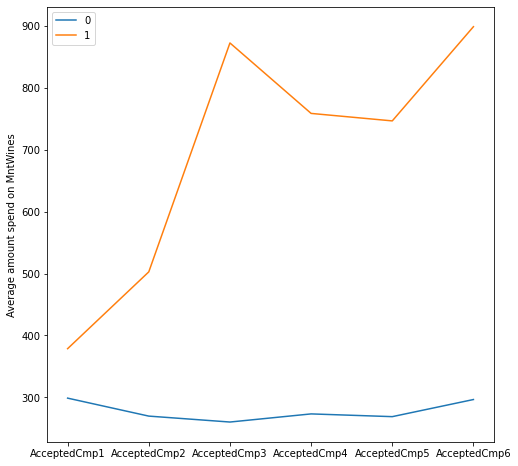

In [1448]:
#here is an example showing how to use this function on the column MntWines
amount_per_campaign('MntWines')

In [1450]:
def amount_per_campaign2(columns_name):
    p1=pd.DataFrame(df.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    p2=pd.DataFrame(df.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    p3=pd.DataFrame(df.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    p4=pd.DataFrame(df.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    p5=pd.DataFrame(df.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    p6=pd.DataFrame(df.groupby(['AcceptedCmp6']).mean()[columns_name]).T
    pd.concat([p1,p2,p3,p4,p5,p6],axis=0).set_index([Camp_cols]).plot(kind='bar', figsize=(8,8))
    plt.ylabel('Average amount spend on' + ' ' + columns_name)
    plt.show()

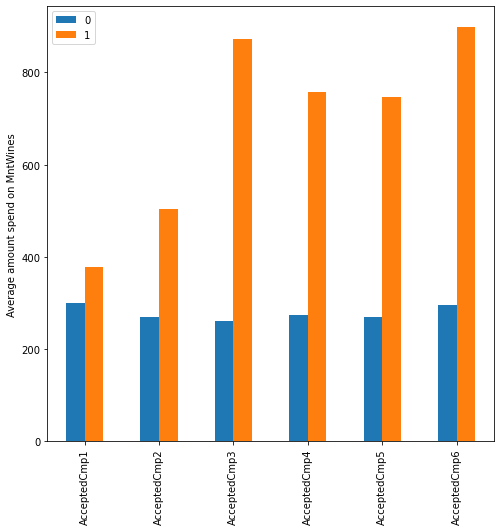

In [1451]:
amount_per_campaign2('MntWines')

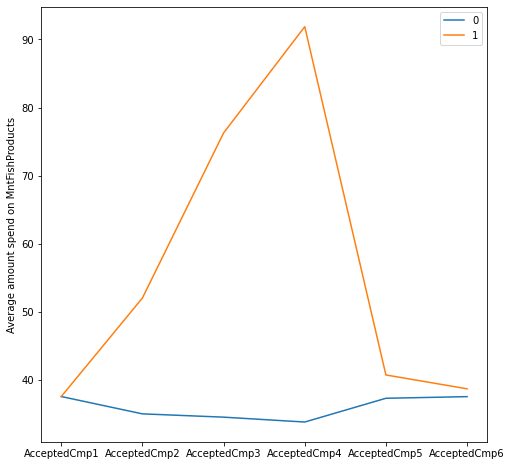

In [1455]:
#here is an example showing how to use this function on the column MntWines
amount_per_campaign('MntFishProducts')

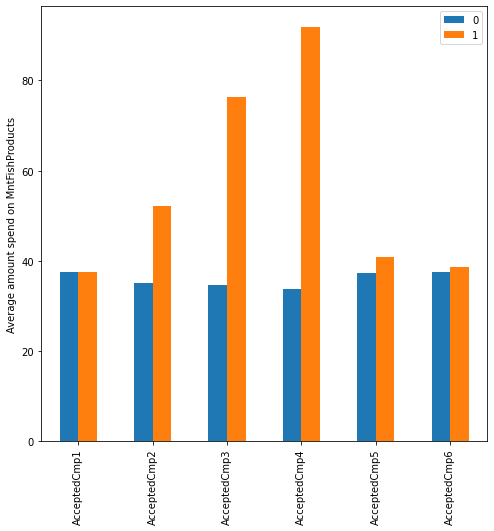

In [1456]:
amount_per_campaign2('MntFishProducts')

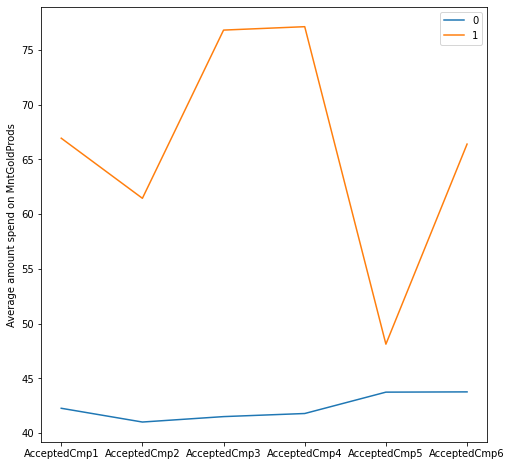

In [1457]:
#here is an example showing how to use this function on the column MntWines
amount_per_campaign('MntGoldProds')

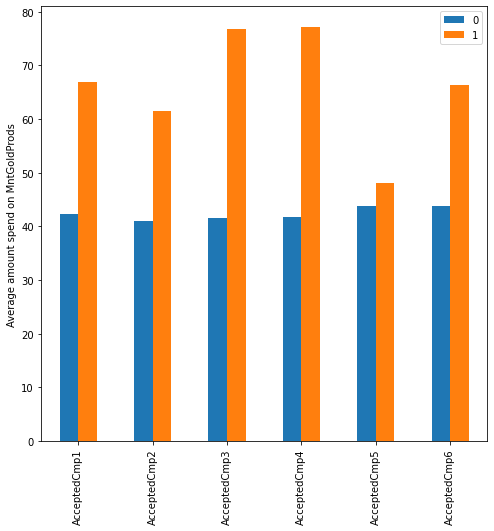

In [1458]:
#here is an example showing how to use this function on the column MntWines
amount_per_campaign2('MntGoldProds')

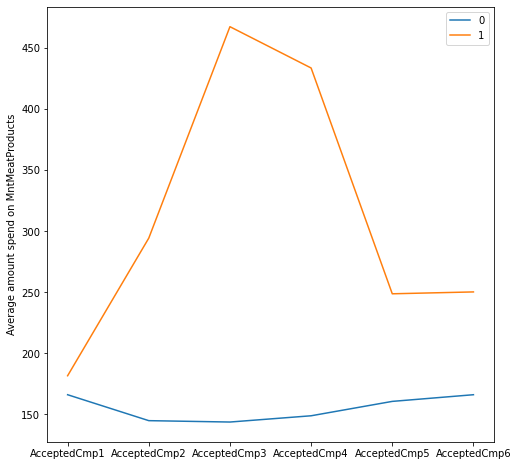

In [1459]:
#here is an example showing how to use this function on the column MntWines
amount_per_campaign('MntMeatProducts')

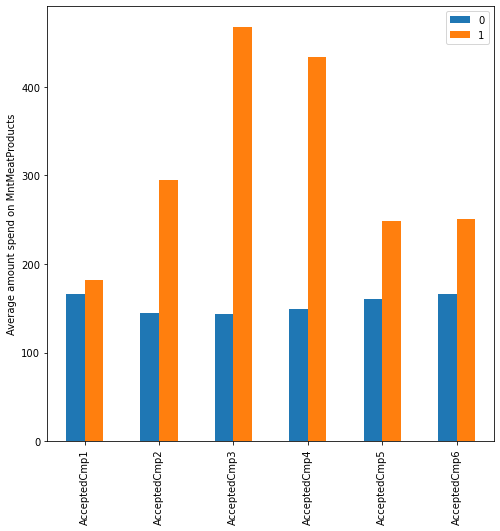

In [1460]:
#here is an example showing how to use this function on the column MntWines
amount_per_campaign2('MntMeatProducts')

**Observations:**
- For the customers accepting campaign 3, 4, 5, and 6 the average amount spent on wine is quite high.

### **Question 4: Write the code and your observations on average amount spent on different products across all campaigns.** - 7 Marks

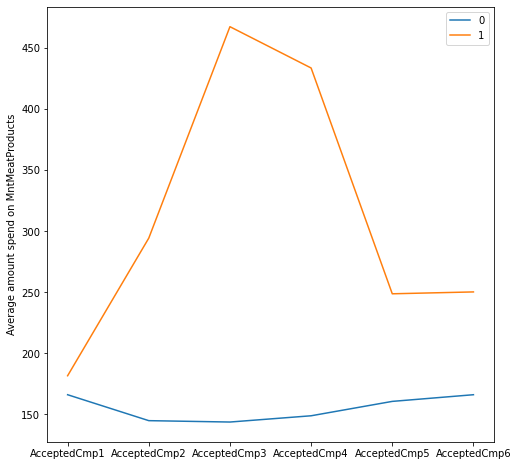

In [1464]:
#meat products

#call the function amount_per_campaign for MntMeatProducts
amount_per_campaign('MntMeatProducts')

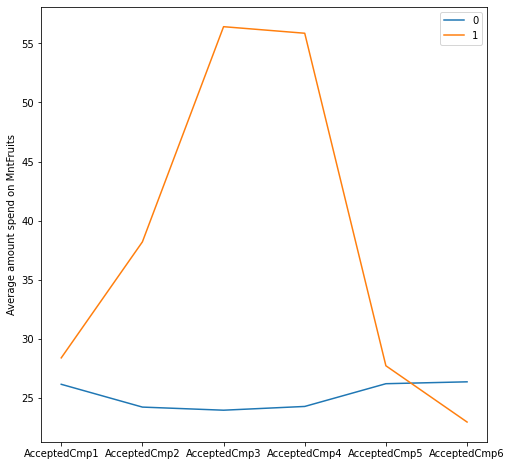

In [1473]:
# Fruit products

#call the function amount_per_campaign for MntFruits
amount_per_campaign('MntFruits')

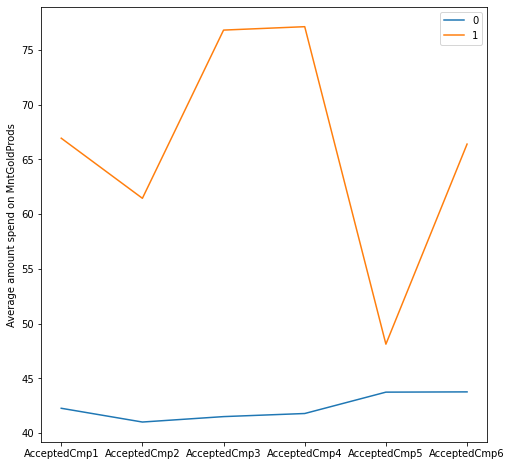

In [1471]:
# gold products

#call the function amount_per_campaign for MntGoldProds
amount_per_campaign('MntGoldProds')

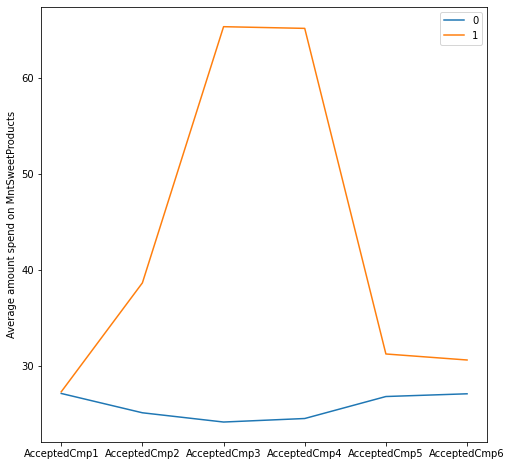

In [1474]:
#sweet products

#call the function amount_per_campaign for MntSweetProducts
amount_per_campaign('MntSweetProducts')

**Observations:**
- For the customers accepting campaign, 2,3,4 there is signifficant increase of average spend on meat from circa 170 to peak at campain 3 
at circa 470 spend. To then slightly fall in campain 4 to massively drop to circa 250 in campaign 4 to stabilize.
- For customers accepting campaign 2,3,4 there is a massive increase of average spend on Fruits from circa 30 to circa 60 average spend, to almost stabilize in 
campain 4 , then to plummetlower average than before campain 1 to almost 0, at the same time increaseing in the last campain the average spend of 
customers not accepting the offer in campain. 
- Gold products increased in the third campain and were steady around 80 average till campain 4 and drastically fell in campain 5 to
 increase in the 6 campain. The fluctuations in spend are really high but the 4tc campain led to the lowest average spend. We see high increases
in campaign 3 and 6
- Sweet products average spend massively inceases by over 2 fold batween campain 1,2,3 to stabilitize in 4th campain to falli n 5th to previous levels.
Campain 4,5led to the highest increases in average spend of customers accepting the offers. There is a drastic down trend in Campain 5 across all products, that is only
improved in campain 6 of increase in average spend for gold products.
Across the board we see a signifficant increase of average spend in campaign 3

### We have analyzed the relationship between campaigns and different products. Now, let's see the relationship of campaigns with different purchasing channels.

We have a defined a function which will take the column name of the channel name as input and will generate the barplot for every campaign and average purchase made through that channel if the campaign is accepted

In [1373]:
def Purchases_per_campaign(columns_name):
    dp1=pd.DataFrame(df.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    dp2=pd.DataFrame(df.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    dp3=pd.DataFrame(df.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    dp4=pd.DataFrame(df.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    dp5=pd.DataFrame(df.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    dp6=pd.DataFrame(df.groupby(['AcceptedCmp6']).mean()[columns_name]).T
    pd.concat([dp1,dp2,dp3,dp4,dp5,dp6],axis=0).set_index([Camp_cols]).plot(kind='line', figsize=(8,8))
    plt.ylabel('Average' + ' ' + columns_name)
    plt.show()

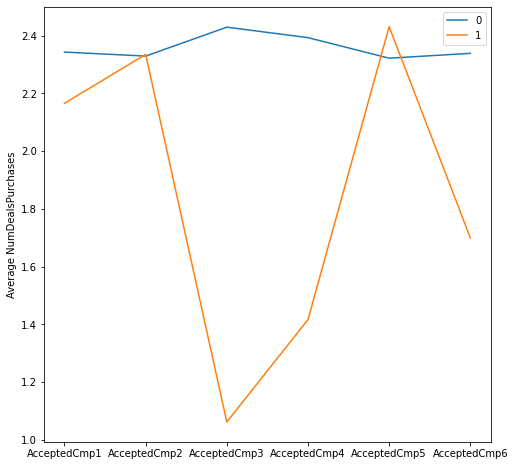

In [1374]:
#here is an example showing how to use this function on the column NumDealsPurchases
Purchases_per_campaign('NumDealsPurchases')

**Observations:**
- For the customers accepting campaign 3, 4, and 6 the average deals purchase is quite low.

### **Question 5: Write the code and your observations on average number of purchases from different channels across all campaigns.** - 7 Marks

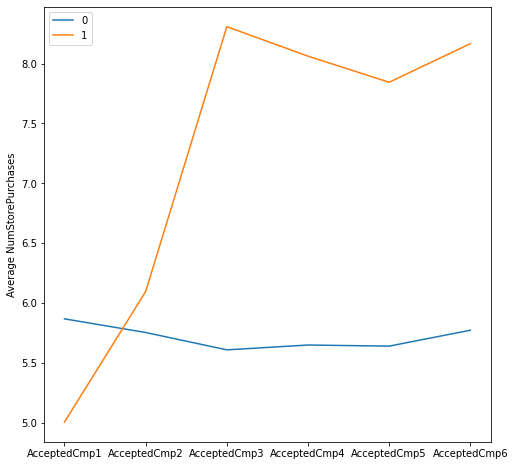

In [1477]:
# store purchase

#call the function Purchases_per_campaign for NumStorePurchases
Purchases_per_campaign('NumStorePurchases')

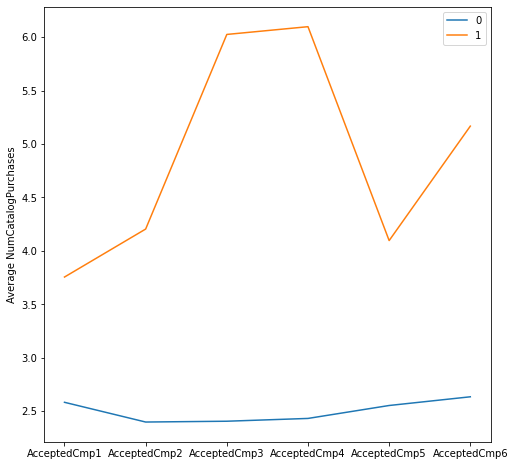

In [1478]:
#Catalog purchase

#call the function Purchases_per_campaign for NumCatalogPurchases
Purchases_per_campaign('NumCatalogPurchases')

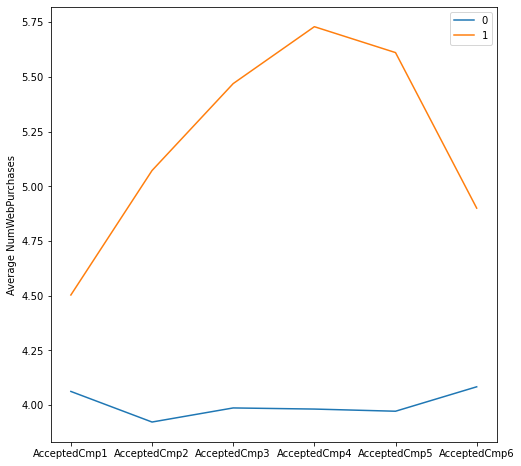

In [1480]:
#Web purchases

#call the function Purchases_per_campaign for NumWebPurchases
Purchases_per_campaign('NumWebPurchases')

**Observations:**

For customers accepting offers in campaign 2,3,4,5,6 the in store average purchase is quite high and increasing to stabilize at levels over 8.
The average number of purchases in campaign 1,2 steadliy decreases for not accepted offers to stablize at the same level of circa 5,7
For customers  accepting offers in campaign 2,3,4 in catalog purchases we see we see double increase of average number of purchases by almost
2 fold. There is a signifficant drop in campain 5 in number of purchses of customerss who accepted the offer.
Web purchases steadliy increase in number of purchases for accepted campaign 2,3,4 to slightly drop in 5 and decrease further in campaign 6
Thre is an overall drop in average number of purchases from campain 5 across all channels with the most signifficant drop in catalog purchase 
Campain 6 led to a significant increase of number of items bout using catalog and slight increase in physical store. There are some signs of web purchase issues in
campaign 6


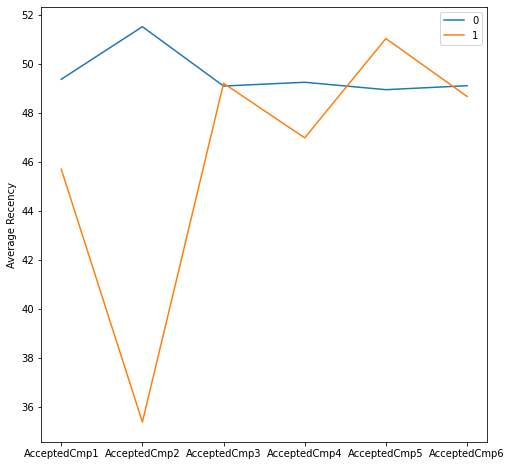

In [1378]:
#Recency

Purchases_per_campaign('Recency')

**Observations:**
- Average recency of the customers who accepted campaign 2 is quite low which implies that campaign 2 was accepted by the customers who recently purchased an item. 

#### We have analyzed the relationship between campaigns and numerical variables. Let's see the relationship of campaigns with different categorical variables

We will check the percentage acceptance of each campaign with respect to each category in the categorical variable. The percentage acceptance is calculated as number of customers who have accepted the campaign to the total number of customers.

In [1379]:
def Cat_Campaign_Relation(df, column_name):
    e1=(df.groupby([column_name]).sum()['AcceptedCmp1']/df.groupby([column_name]).count()['AcceptedCmp1'])
    e2=(df.groupby([column_name]).sum()['AcceptedCmp2']/df.groupby([column_name]).count()['AcceptedCmp2'])
    e3=(df.groupby([column_name]).sum()['AcceptedCmp3']/df.groupby([column_name]).count()['AcceptedCmp3'])
    e4=(df.groupby([column_name]).sum()['AcceptedCmp4']/df.groupby([column_name]).count()['AcceptedCmp4'])
    e5=(df.groupby([column_name]).sum()['AcceptedCmp5']/df.groupby([column_name]).count()['AcceptedCmp5'])
    e6=(df.groupby([column_name]).sum()['AcceptedCmp6']/df.groupby([column_name]).count()['AcceptedCmp6'])
    df_new=pd.concat([e1,e2,e3,e4,e5,e6],axis=1).T
    plt.figure(figsize=(8,8))
    sns.lineplot(data=df_new, markers=True, linewidth=2)
    plt.ylabel('Percentage Acceptance')
    plt.show()

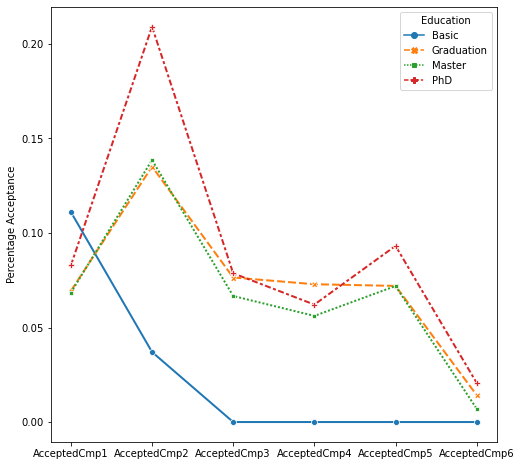

In [1380]:
#here is an example showing how to use this function on the column Education
Cat_Campaign_Relation(df, 'Education')

**Observations:**

- More than 20% of the customers with Ph.D have accepted campaign 2.
- Customers with basic education have only accepted campaign 1 and 2.
- Except customers with basic education level, all education levels follow the same trend.

### **Question 6: Write the code and your observations on percentage acceptance for different categorical variables across all campaigns.** - 7 Marks

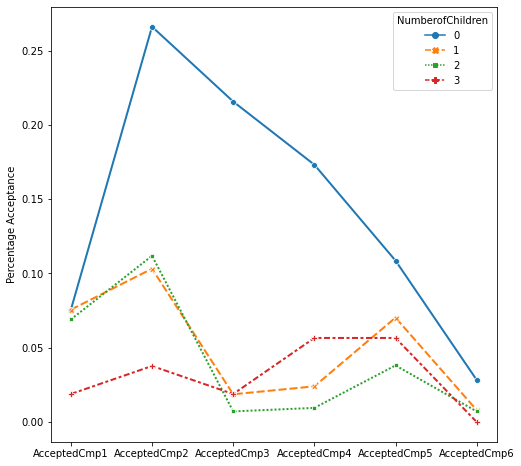

In [1481]:
#NumberofChildren

#call the function Cat_Campaign_Relation for NumberofChildren
Cat_Campaign_Relation(df, 'NumberofChildren')

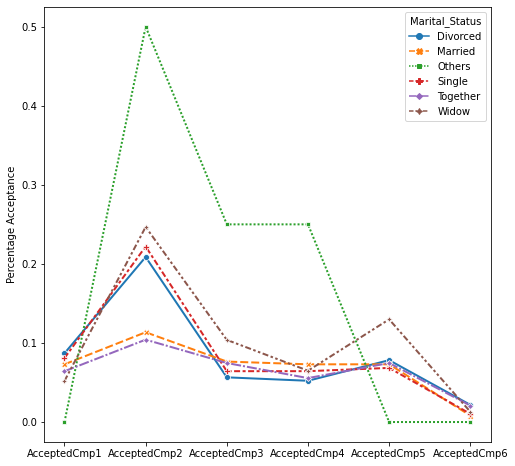

In [1482]:
#Let's filter the observations with 'Others' category as they are only 4 such observations
df_rest=df[df.Marital_Status!='Others']

#call the function Cat_Campaign_Relation for Marital_Status with dataframe df_rest
Cat_Campaign_Relation(df, 'Marital_Status')

<AxesSubplot:ylabel='Country'>

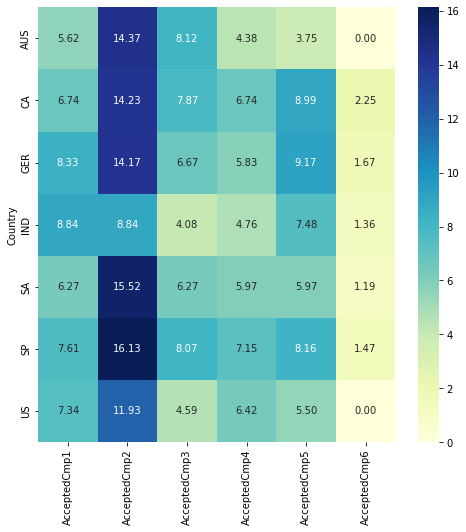

In [1383]:
#Let's filter the observations for 'ME' country as they are only 3 such observations
df_not_mexico=df[df.Country!='ME']

#Plot
plt.figure(figsize=(8,8))
sns.heatmap((df_not_mexico.groupby('Country').sum()[Camp_cols]/df_not_mexico.groupby('Country').count()[Camp_cols])*100, annot=True, fmt='0.2f', cmap="YlGnBu")

**Observation:**

We see highest acceptance in campain2 across all campains iin countries ['US', SP, GER, CA, AUS'] having the higest acceptance in Spain.
SP,GER,CA,AUS have got high acceptance in campaign 1,2,3

We have null acceptance in AUS, US in campaign 6. 

There is an overall drop in acceptance across all countries in campaign 6

Campaign 2 is the most succesfull in terms of conversions with acceptance over 10% acrosss most countries, bar India

The acceptance in india was at circa 9% in campaign 1,2 to fall by a half in campaign 3,4 to increase again in campaign 5 to previous levels to drop again in c6

Australia was also hit by 50% drop in acceptance from previous campaigns in campaign 4,5

Almost all countries fell to acceptance close to 1 percent in campaign 6  bar australia and the US who fell to 0



### Check the product preferences by customers

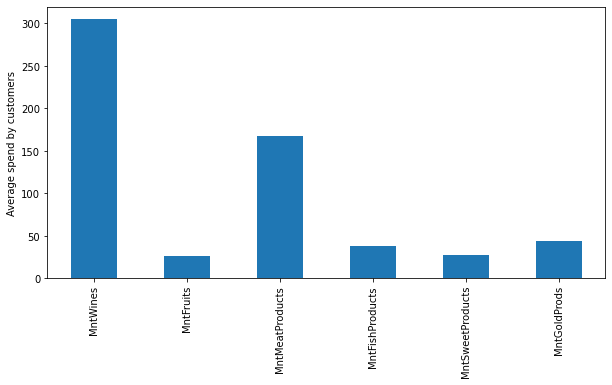

In [1384]:
#creating a list which contains name of all products

mnt_cols = [col for col in df.columns if 'Mnt' in col]

spending=df[mnt_cols].mean(axis=0)
spending.plot(kind='bar', figsize=(10,5))
plt.ylabel("Average spend by customers")
plt.show()

**Observations**:

- The mean amount spent by customers in the last 2 years is highest for wines followed by meat products.

Let's check if the product preferences are similar for different types of customers. We will calculate the percentage amount spent by customers on a product for each category with respect to the total spending by customers belonging to that category.

In [1385]:
def amount_per_category(df, column_name):
    df_new1=((df.groupby([column_name]).sum()[mnt_cols].T)/df.groupby([column_name]).sum()['Total_Spending'])
    plt.figure(figsize=(10,8))
    sns.heatmap(df_new1.T, annot=True, cmap="YlGnBu")
    plt.show()

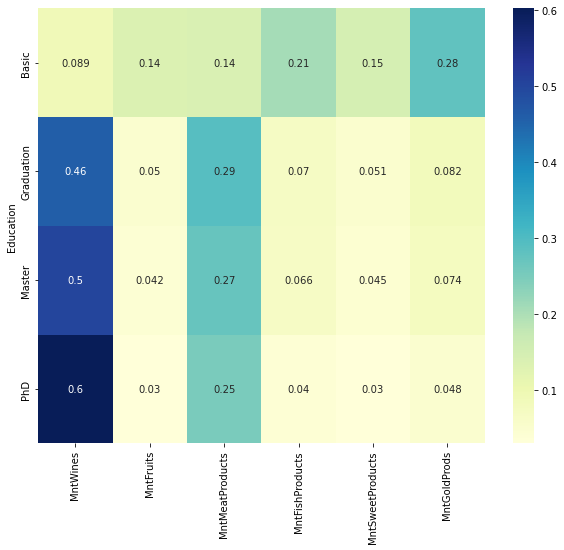

In [1483]:
# plot showing the percentage of total spending of different products by a group of customers having the same education level

amount_per_category(df, 'Education')

**Observations:**
- Customers with PhD spend ~60% of their total spending on wines.
- Customers with Graduation and Master's spend ~45-50% of their total spending on wines.
- Customers with Graduation and Master's spend ~27-29% of their total spending on meat.
- Customers with PhD spend ~25% of their total spending on meat.
- Customers having education level Master or PhD spend ~80% on meat and wines.
- Customers with basic education spend more on Fruits, Fish, Sweet, and Gold products.

### **Question 7: Write the code and your observations on percentage amount spent on different products for each category of the mentioned categorical variables.** - 7 Marks

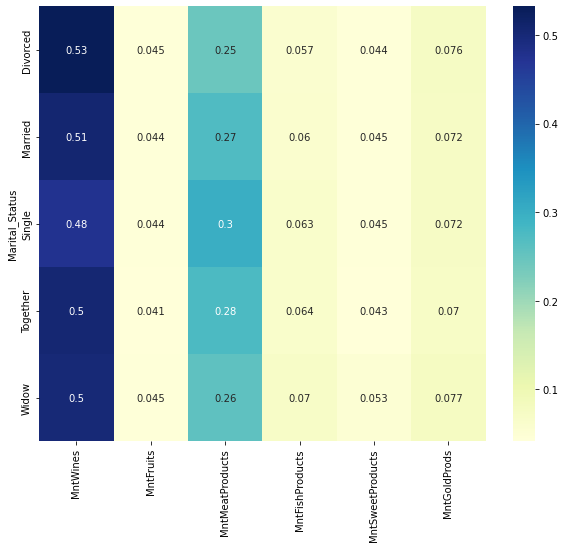

In [1484]:
#call the function amount_per_category for Marital_Status with dataframe df_rest
amount_per_category(df_rest, 'Marital_Status')

In [1485]:
#call the function amount_per_category for Country with dataframe df_not_mexico

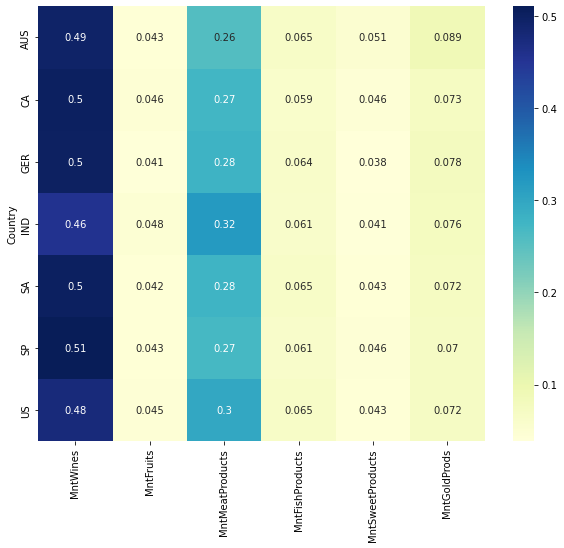

In [1487]:
amount_per_category(df_not_mexico, 'Country')

**Observations:**

Wine purchse is very popular across all groups. With over 50% being spent on alcohol
Meat products are also popular with over 25 to 28% of total spend
The lowest percentage of total sale is spent on Furits that is less than 0,5% and seet products close to 0,5%
Gold prducts are also similrly bought across all groups with very low % of total spend
We see a generic pattern across all groups in their expenditures for different kind of products. The higherst preference is in wines and meat products.
The situation is very similar when we look into country locaiton fo custoemrs the distribution of spend is siimlar to the same division based on martial status. 
It is transparent that neither martial status nor country location signifficanlty impact customer purchase habits they are all shaped similarly


### Check different channel performances 

Let's calculate the percentage of purchases for all the channels.

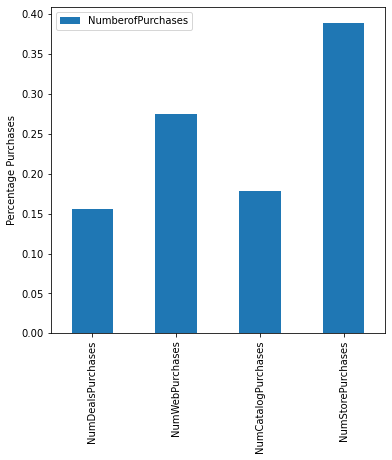

In [1389]:
# list of cols for channels

channel_cols = [col for col in df.columns if 'Purchases' in col] 

#making dataframe of columns having purchase and taking sum of them.
channels = pd.DataFrame(df[channel_cols].sum()/df.Total_Purchase.sum(), columns=['NumberofPurchases'])

# plot
channels.plot(kind='bar', figsize=(6,6))
plt.ylabel("Percentage Purchases")
plt.show()

**Observations**:

- We can see that the most purchases are from the stores followed by web purchases.
- Number of deal purchases and catalog purchases are low.

### **Question 8: Write your observations on percentage purchases from different channels for different categories of the income_cat column.** - 4 Marks

Let's check how number of purchases via different channels varies for different income bins.

In [1390]:
#Binning the income column
df['income_cat']=pd.qcut(df.Income, q=[0, 0.25, 0.50, 0.75, 1], labels=['low', 'medium', 'high', 'very_high'])

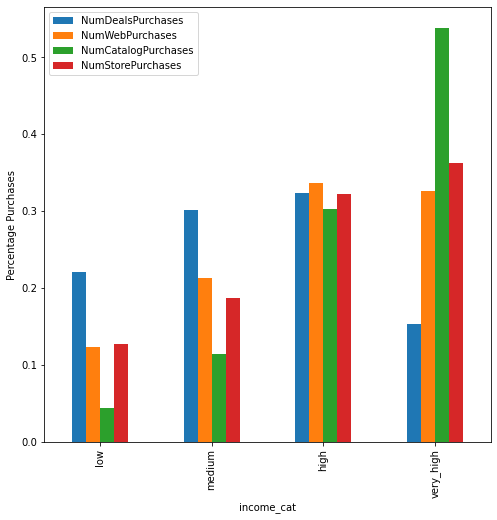

In [1391]:
group=df.groupby('income_cat').sum()[channel_cols]
(group/group.sum()).plot(kind='bar', figsize=(8,8))
plt.ylabel("Percentage Purchases")
plt.show()

**Observations:**

Very high level customers prefer purchasing items using catalog purchse with over 50% of them preferring to use that channel . They don't shy from store purchases with 40% of purchses and web at over 30%. The deals are the lest favrouable at circa 15%. 
There is a very high difference between very high earners who are attracted 2ice as much to catalog purchases than high earner, and even those are very eager to use that channel with over 30% of acceptance.
High Earners use all channels for purchase almost equally with web being slightly higher by few percentages than other channels.
Low and Medium earners don't use much catalog purchases being the lowest in their acceptance preference, in low earners below 5% and medium slightly over 10%
Low and Medium earners prefer deals purchases at circa 20% and circa 30%, with web purchases and store purchases being more favourale.
Low earners slightly more prefer in shop purchases than Web, and medium income purchases the other way round the difference is few percantages.
Deal purchases are mostly popualr in the 2 lowest earning groups domeneering over other channels. 
Web purchases arer more popular than store purchases in mediu group than low earners oscilating at circa 20%


### We can also visualize the correlation by purchases from different channels and income of the customer.

### **Question 9: Find the correlation matrix for the columns mentioned below and visualize the same using heatmap.** - 3 Marks

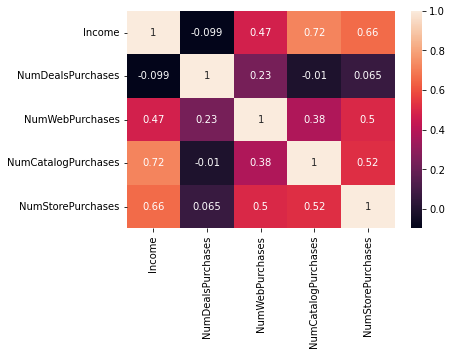

In [1488]:
corr=df[['Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' ]].corr()

#Write your code here
# plot heatmap
# 'annot=True' returns the correlation values 
sns.heatmap(corr, annot = True)

# display the plot
plt.show()

**Observations:**

We see high positive correlation between income and catalogue and in store purchases at 0.72 and 0.66. With increased income these channel sales increase the most.
Customers who purchase via web also increase number of store purchases. Those who purchase using catalog also purchase in store. 
Customers who purchase in store are not correlated with those who purchase in deals, deals are also not influcneced by income.
There is a slight correlation with discount purchase and web purchase, it is the stron
In store purchases are also positively correlated with web and catalog.
There is slight negative correlation between discounts and income.

As we know from our analysis we have done so far that customers with income, number of children, and amount spending on wines are the important factors.  Let's try to come up with new customer profile on the basis of these 3 attributes and check what would be the acceptance rate for that customer profile.

In [1393]:
df3=df[df.Income>52000]
df4=df3[df3.MntWines>df3.MntWines.mean()]
new_profile=df4[df4.NumberofChildren==0]

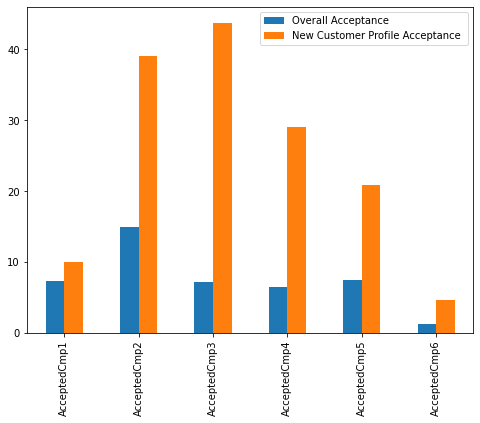

In [1394]:
#Calculating success rate of each campaign for both segments 
success_campaign3=pd.DataFrame(success_campaign, columns=['Overall Acceptance'])

success_campaign4=pd.DataFrame((new_profile[Camp_cols].sum()/new_profile.shape[0])*100, columns=['New Customer Profile Acceptance '])

# plot
pd.concat([success_campaign3, success_campaign4], axis=1).plot(kind='bar', figsize=(8,6))
plt.title("")
plt.ylabel("")
plt.show()

**Observations:**
- Orange bars in the plot indicates that acceptance rate would have been high for new customer profile i.e. income greater than the mean income, no kid at home, amount spent of wines is greater than the mean amount spent on wines.

### **Question 10: Based on your analysis, write the conclusions and recommendations for the CMO to help make the next marketing campaign strategy.** - 10 Marks

## Conclusion and Recommendations

#Write your conclusions here
THe customer achieved high acceptance ratio for customers who are single, their income is greater than mean and have no chilidren. Their preference was to buy wines over other products. Those campaigns achieved signifficant success in campaign 2,3,4,5, in campaign 3 and 4 achieving circa 40% of acceptance. 
The shop must focus on targeting this group of customers as their latest advertising campaigns have failed which is campaign 4,5,6. With the 6th cmaping decreasing the acceptance of that group from over 40% at its peak to less than 5%. 
The shop must focus on advertising wines, ethnic group does not play any role, probably the younger generation will be the target group without children who graduated or have higher degrees. 
The shop must improve the previously good acceptance ration that fell from signifficant over 45% to less than 5% first and then focus on targetting new customer groups. 
The sale channel should be store and web with discounts with targeted audience of customers who earn more than mean that is 52247

#Write your recommendations here